2.2 number of parameters in gaussian mixture model with full covariance matrices: 
for D=3 dimension and K=2 cluster For each Gaussian you have:
1. A Symmetric full DxD covariance matrix giving (D*D - D)/2 + D parameters ((D*D - D)/2 is the number of off-diagonal elements and D is the number of diagonal elements)
2. A D dimensional mean vector giving D parameters
3. A mixing weight giving another parameter

This results in Df = (D*D - D)/2 + 2D + 1 for each gaussian.
Given you have K components, you have (K*Df)-1 parameters. Because the mixing weights must sum to 1, you only need to find K-1 of them. The Kth weight can be calculated by subtracting the sum of the (K-1) weights from 1
so in our case Df = (3*3-3)/2 + 6 + 1, Df= 10
and given 2 components then : (2*10)-1 = 19 parameters

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
cancer_data = pd.read_csv('cancer_all.csv')
cancer_data

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
from sklearn.mixture import GaussianMixture

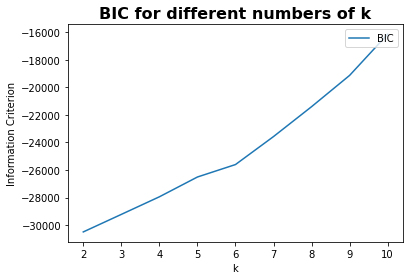

In [6]:
Sum_bic = []

K = range(2,11)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(cancer_data)
    Sum_bic.append(gmm.bic(cancer_data))
x = K
y = Sum_bic
plt.plot(x , y, label = "BIC")

plt.title("BIC for different numbers of k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("Information Criterion")
plt.legend(loc='upper right')
plt.show()

BIC gives us an estimation on how much is good the GMM in terms of predicting the data we actually have.
The lower is the BIC, the better is the model to actually predict the data we have. In order to avoid overfitting, this technique penalizes models with big number of clusters.
So now in our case k=2 is the best choice of number of cluster because it has the lowest BIC.


In [7]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
   

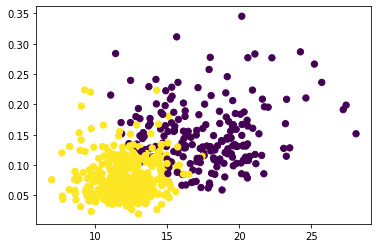

In [8]:
gmm = GaussianMixture(n_components=2)
gmm.fit(cancer_data)
labels = gmm.predict(cancer_data)
ax = plt.gca()
ax.scatter(cancer_data.loc[:, 'mean radius'], cancer_data.loc[:, 'mean compactness'], c=labels, s=40, cmap='viridis')

K-Means Clustering:

It is an algorithm, which classifies samples based on attributes/features into K number of clusters. Clustering or grouping of samples is done by minimizing the distance between sample and the centroid. i.e. Assign the centroid and optimize the centroid based on the distances from the points to it. This is called as Hard Assignment i.e. We are certain that particular points belong to particular centroid and then based on the least squares distance method, we will optimize the place of the centroid.

Advantages of K-Means:

1. Running Time

2. Better for high dimensional data.

3. Easy to interpret and Implement.

Disadvantages of K-Means:

1. Assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear)

2. Hard Assignment might lead to mis grouping.

Guassian Mixture:

Instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster.

Advantages:

1. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.

2. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).

Disadvantages:

1. Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.

2. Difficult to interpret


so based on points which mentioned above, I think kmean should performs better on this dataset as it has 31 dimensionality so intialization of clusters will be difficult.

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

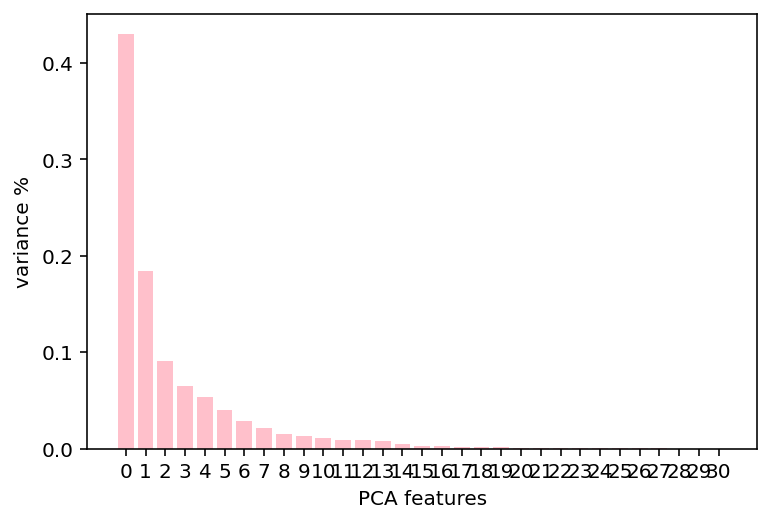

In [27]:
%config InlineBackend.figure_format='retina'
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(cancer_data)
# Create a PCA instance: pca
pca = PCA(n_components=31)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='pink')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

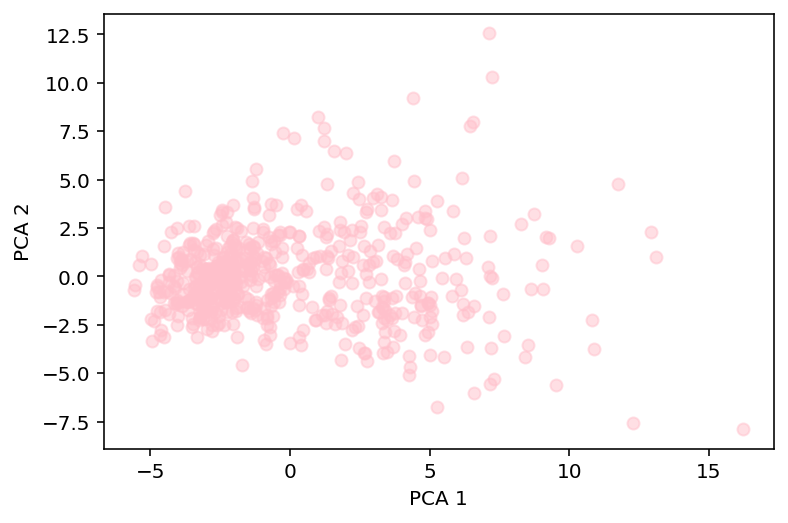

In [29]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, color='pink')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

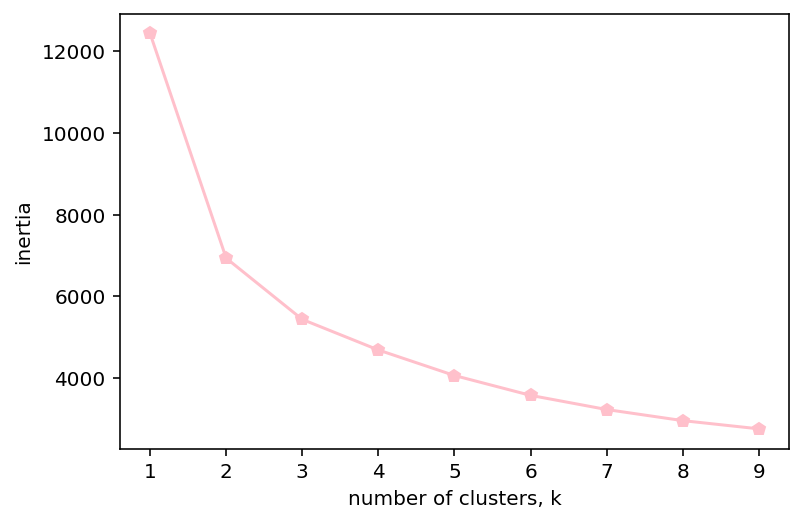

In [26]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='pink')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

figure shows that after 3 clusters at the change in the value of inertia is no longer significant and most likely, neither is the variance of the rest of the data after the elbow point. Therefore we can discard everything after k=3 and proceed to the last step in the proces

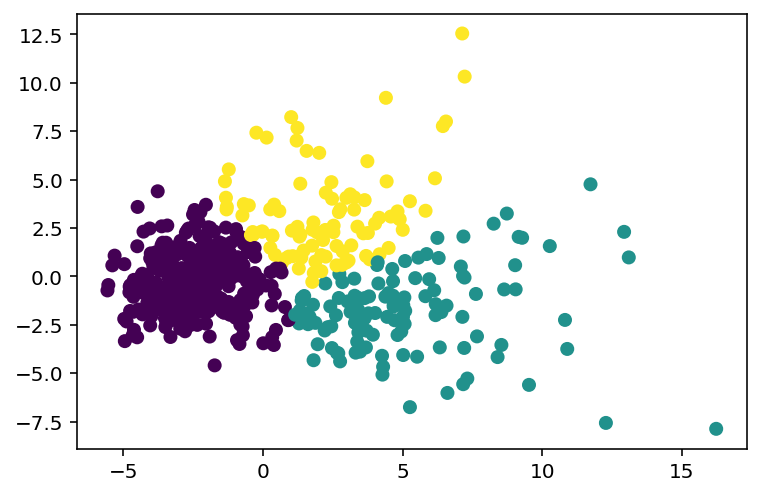

In [31]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

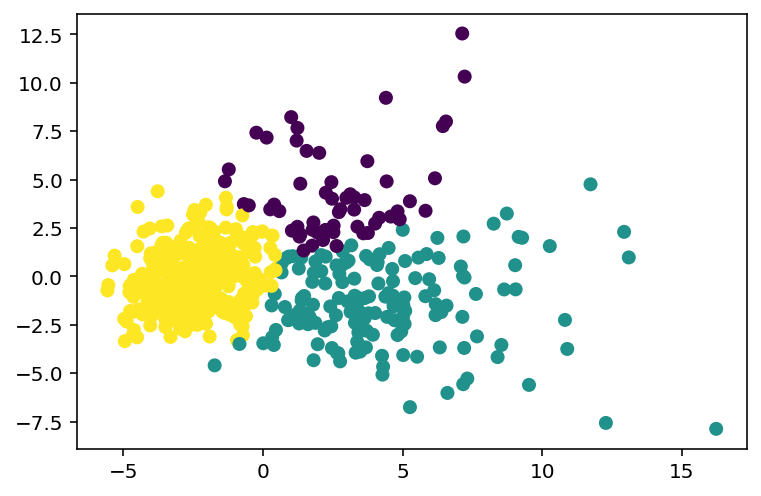

In [33]:
model = GaussianMixture(n_components=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

2.6. k-means only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data.
GMM is a lot more flexible in terms of cluster covariance
k-means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0. This implies that a point will get assigned only to the cluster closest to it. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in kmeans. As a result, cluster assignment is much more flexible in GMM than in k-means.